Common for question 6 & 7:

In [1]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Open and convert to grayscale (2D array)
img = Image.open("2.jpg")
# Convert image to grayscale so each pixel has a single intensity value,
# making it suitable for colormap mapping as colormaps are designed to map scalar data 
# (such as temperature, elevation, or intensity) to colors. 
# Without grayscale, we need to decide which channel (R, G, or B) to use or compute a combined intensity,
# which adds complexity.
img_g = img.convert("L")
img_np = np.array(img_g)

Question 6:

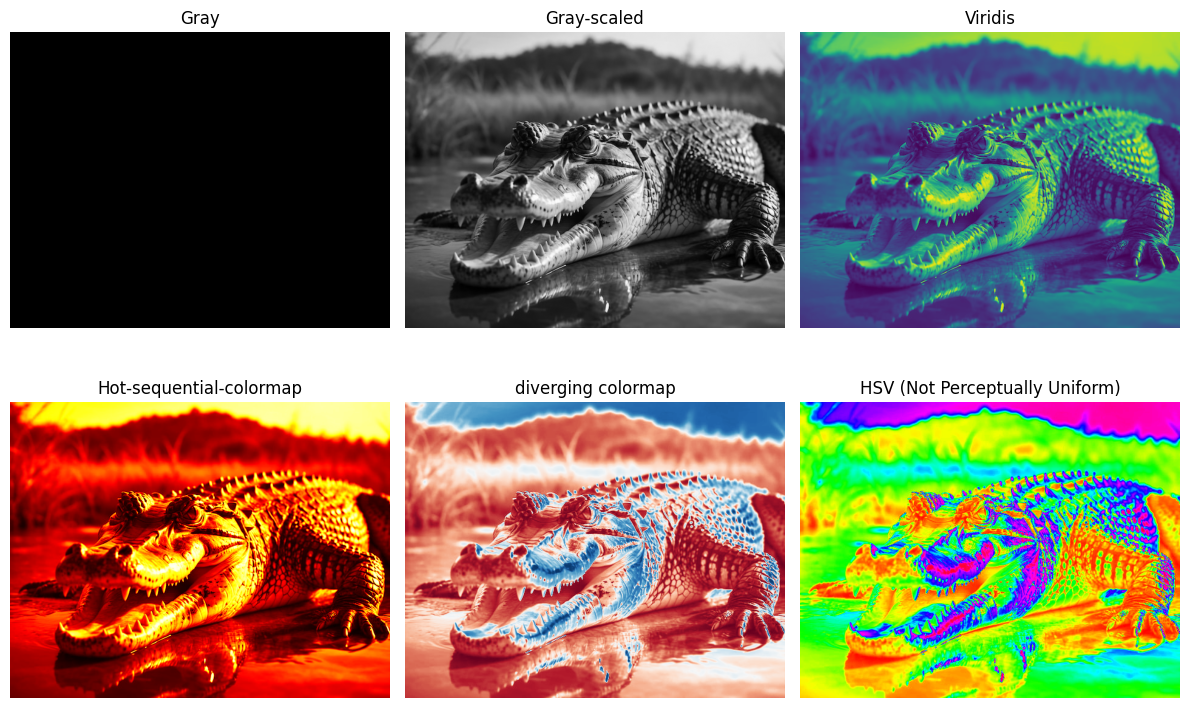

In [10]:


# Create figure and named axes
f, axes = plt.subplots(2, 3, figsize=(12, 8))
(aG, aS, aV, aH, aRB, aHSV) = axes.flatten()

# cmap = Gray
aG.imshow(img_np, cmap="gray",  vmin=0, vmax= (2**16) -1)
aG.set_axis_off()
aG.set_title("Gray")

# cmap = Gray-scaled 
aS.imshow(img_np, cmap="gray")
aS.set_axis_off()
aS.set_title("Gray-scaled")

# cmap = Viridis 
aV.imshow(img_np, cmap="viridis")
aV.set_axis_off()
aV.set_title("Viridis")

# 4. cmap = hot
aH.imshow(img_np, cmap="hot")
aH.set_axis_off()
aH.set_title("Hot-sequential-colormap")

# 5. cmap = diverging colormap
aRB.imshow(img_np, cmap="RdBu")
aRB.set_axis_off()
aRB.set_title("diverging colormap")

# 6. cmap = hsv
aHSV.imshow(img_np, cmap="hsv")
aHSV.set_axis_off()
aHSV.set_title("HSV (Not Perceptually Uniform)")

plt.tight_layout()
plt.show()


Question 7:

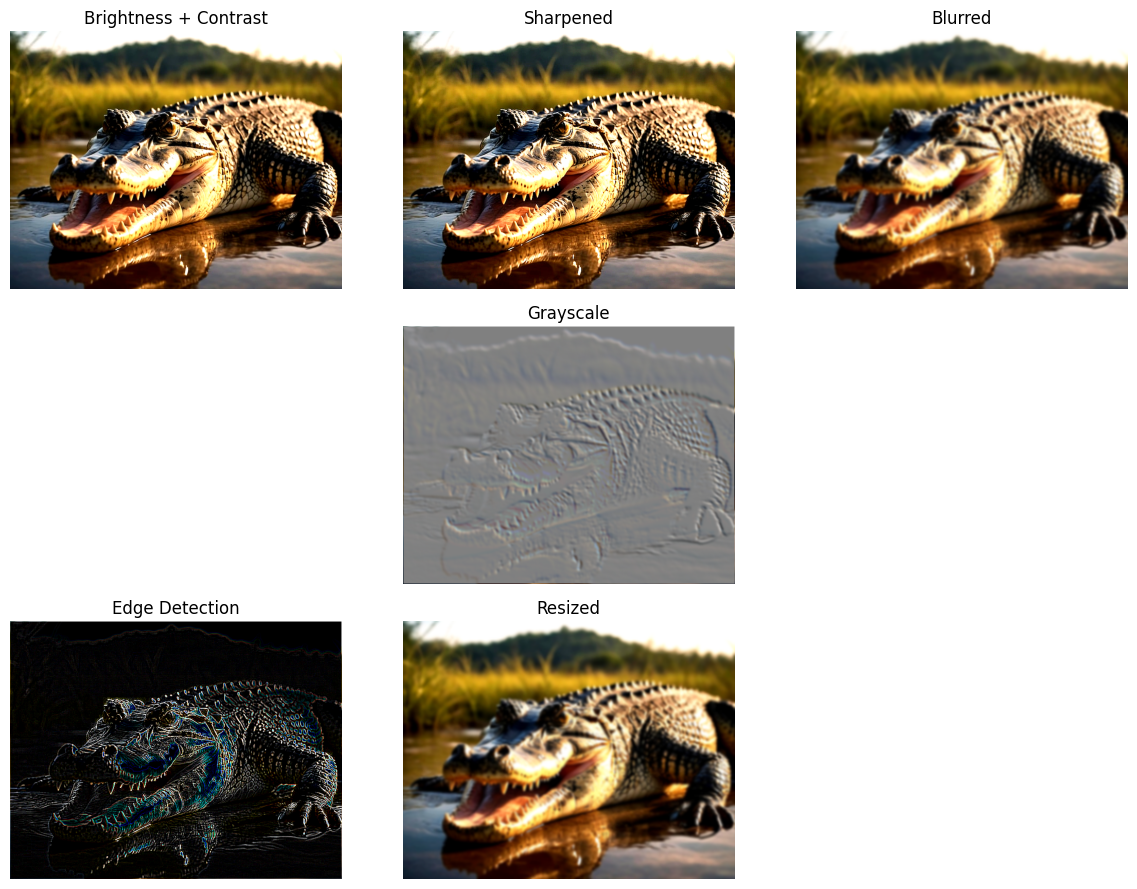

In [8]:
# Brightness and contrast enhancement
# ImageEnhance provides methods to adjust image properties like brightness and contrast.
enhancer_brightness = ImageEnhance.Brightness(img)  # Create brightness enhancer for original image
bright_img = enhancer_brightness.enhance(1.2)       # Increase brightness by 20% (factor > 1 brightens)

enhancer_contrast = ImageEnhance.Contrast(bright_img)  # Create contrast enhancer for brightened image
contrast_img = enhancer_contrast.enhance(1.3)          # Increase contrast by 30% (factor > 1 increases contrast)

# Sharpening
# Apply SHARPEN filter to enhance edges and details in the image.
sharpened_img = contrast_img.filter(ImageFilter.SHARPEN)

# Blur
# Apply Gaussian blur with radius=1 to soften details and reduce noise.
blurred_img = sharpened_img.filter(ImageFilter.GaussianBlur(radius=2))

# Emboss conversion
# Convert sharpened image to EMBOSS
gray_img = blurred_img.filter(ImageFilter.EMBOSS)

# Edge detection
# Apply FIND_EDGES filter to highlight edges in the grayscale image.
edges_img = contrast_img.filter(ImageFilter.FIND_EDGES)

# Resize
# Reduce image size to half of original width and height for compact display.
resized_img = blurred_img.resize((img.width // 2, img.height // 2))

# Create figure for displaying processed images
fig = plt.figure(figsize=(12, 9))

# We need a custom layout (3-1-2 pattern), which plt.subplots() cannot easily handle.
# GridSpec gives fine control over subplot positions.
gs = gridspec.GridSpec(3, 3)  # Define a 3x3 grid for flexible placement

# Define axes positions manually using GridSpec
axes = [
    fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2]),  # Row 1
    fig.add_subplot(gs[1, 1]),  # Row 2: centered
    fig.add_subplot(gs[2, 0]), fig.add_subplot(gs[2, 1])  # Row 3
]

# Titles for each processed image
titles = ["Brightness + Contrast", "Sharpened", "Blurred",
          "Grayscale", "Edge Detection", "Resized"]

# List of processed images to display
images = [contrast_img, sharpened_img, blurred_img, gray_img, edges_img, resized_img]

# Display each image in its corresponding subplot
for ax, im, title in zip(axes, images, titles):
    # Use grayscale colormap if image mode is 'L' (grayscale), else default
    ax.imshow(im, cmap="gray" if im.mode == "L" else None)
    ax.set_title(title)  # Set title for each subplot
    ax.axis("off")       # Hide axis ticks and labels for clean look

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()